# BP decoding for [7, 4, 3] Hamming Code

You can see the logical error example.

In [42]:
from multiple_stabilizers import fill_Z_with_stabilizer_shape
from sympy import Matrix
import numpy as np
from multiple_stabilizers import get_condition_indices, generate_parity_check_matrix
from ldpc import BpDecoder
import ldpc.code_util

error_rate = 0.4

H_matrix = np.array([
    [1, 0, 1, 0, 1, 0, 1],
    [0, 1, 1, 0, 0, 1, 1],
    [0, 0, 0, 1, 1, 1, 1]
], dtype=int)

codeword = np.zeros((H_matrix.shape[1],), dtype=int)
print("Initial codeword (all zeros):")
print(codeword)

bpd = BpDecoder(
    H_matrix,  # the parity check matrix
    error_rate=error_rate,
    max_iter=n,  # the maximum number of iterations for BP
    bp_method="minimum_sum",  # the BP method
    ms_scaling_factor=0  # min sum scaling factor. If set to zero the variable scaling factor method is used
)

# make error with probability error_rate for each bit
error = (np.random.rand(len(codeword)) < error_rate).astype(int)

# weight of error
print("Weight of error:", np.sum(error))

received = (codeword + error) % 2

# syndrome calculation
syndrome = np.mod(H_matrix @ received, 2)
print("Syndrome:")
print(syndrome)
print("Shape of syndrome:", syndrome.shape)

expected_error = bpd.decode(syndrome)

print("Real Error")
print(error)
print("BP Decoding (expected error):")
print(expected_error)

residual_error = (expected_error + error) % 2
print("Residual error (expected_error + error) % 2:")
print(residual_error)

# If H @ expected_error % 2 == syndrome and expected_error == error, then decoding is correct
# If H @ expected_error % 2 == syndrome, but expected_error != error, then the logical error is detected
# If H @ expected_error % 2 != syndrome, then decoding failed
print("\n")
check_syndrome = np.mod(H_matrix @ expected_error, 2)
if np.array_equal(check_syndrome, syndrome):
    if np.array_equal(expected_error, error):
        print("Decoding successful: H @ expected_error % 2 == s and expected_error == error")
    else:
        print("Logical error detected: H @ expected_error % 2 == s but expected_error != error")
else:
    print("Decoding failed: H @ expected_error % 2 != s")

converge = bpd.converge
print("Converged:", converge)

Initial codeword (all zeros):
[0 0 0 0 0 0 0]
Weight of error: 2
Syndrome:
[1 0 0]
Shape of syndrome: (3,)
Real Error
[0 0 0 0 0 1 1]
BP Decoding (expected error):
[1 0 0 0 0 0 0]
Residual error (expected_error + error) % 2:
[1 0 0 0 0 1 1]


Logical error detected: H @ expected_error % 2 == s but expected_error != error
Converged: True


# BP decoding example for the codeword made by stabilizer shape below
[0, 1, 0], <br>
[1, 1, 0], <br>
[0, 0, 1]

In [32]:
from multiple_stabilizers import fill_Z_with_stabilizer_shape
from sympy import Matrix
import numpy as np
from multiple_stabilizers import get_condition_indices, generate_parity_check_matrix
from ldpc import BpDecoder
import ldpc.code_util

error_rate = 0.2

H, L = 8, 17
n = H * L  # Number of qubits
m = 3
stabilizer_shape = np.array([[0, 1, 0],
                            [1, 1, 0],
                            [0, 0, 1]])

condition_indices = get_condition_indices(stabilizer_shape)

H_matrix = generate_parity_check_matrix(H, L, m, condition_indices)

codeword = np.zeros((H_matrix.shape[1],), dtype=int)
# print("Initial codeword (all zeros):")
# print(codeword.shape)

bpd = BpDecoder(
    H_matrix,  # the parity check matrix
    error_rate=error_rate,
    max_iter=n,  # the maximum number of iterations for BP
    bp_method="minimum_sum",  # the BP method
    ms_scaling_factor=0  # min sum scaling factor. If set to zero the variable scaling factor method is used
)

# make error with probability error_rate for each bit
error = (np.random.rand(len(codeword)) < error_rate).astype(int)

# print("Error vector:")
# print(error)

# weight of error
print("Weight of error:", np.sum(error))

received = (codeword + error) % 2

# syndrome calculation
syndrome = np.mod(H_matrix @ received, 2)
print("Syndrome:")
print(syndrome)
print("Shape of syndrome:", syndrome.shape)

expected_error = bpd.decode(syndrome)

print("Real Error")
print(error)
print("BP Decoding (expected error):")
print(expected_error)

residual_error = (expected_error + error) % 2
print("Residual error (expected_error + error) % 2:")
print(residual_error)

# If H @ expected_error % 2 == syndrome and expected_error == error, then decoding is correct
# If H @ expected_error % 2 == syndrome, but expected_error != error, then the logical error is detected
# If H @ expected_error % 2 != syndrome, then decoding failed
print("\n")
check_syndrome = np.mod(H_matrix @ expected_error, 2)
if np.array_equal(check_syndrome, syndrome):
    if np.array_equal(expected_error, error):
        print("Decoding successful: H @ expected_error % 2 == s and expected_error == error")
    else:
        print("Logical error detected: H @ expected_error % 2 == s but expected_error != error")
else:
    print("Decoding failed: H @ expected_error % 2 != s")

converge = bpd.converge
print("Converged:", converge)

Stabilizer shape:
[[0 1 0]
 [1 1 0]
 [0 0 1]]
Weight of error: 32
Syndrome:
[1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1
 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0]
Shape of syndrome: (102,)
Real Error
[0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]
BP Decoding (expected error):
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Residual error (expected_error + error) % 2:
[0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0

# define function for BP decoding performance

comparison between **decoding success rate** (converged) vs **decoding failure rate** (didn't converge) vs **logical error rate** <br>
- Decoding successful: H @ expected_error % 2 == s and expected_error == error
- Logical error detected: H @ expected_error % 2 == s but expected_error != error
- Decoding failed: H @ expected_error % 2 != s

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix
from multiple_stabilizers import get_condition_indices, generate_parity_check_matrix
from ldpc import BpDecoder
import ldpc.code_util

def simulate_decoder_performance(H, L, m, stabilizer_shape, num_trials=1000, error_range=(0.01, 0.4), num_points=50, bp_method="minimum_sum"):
    n = H * L
    condition_indices = get_condition_indices(stabilizer_shape)
    H_matrix = generate_parity_check_matrix(H, L, m, condition_indices)
    codeword = np.zeros((H_matrix.shape[1],), dtype=int) # all zeros codeword

    error_rates = np.linspace(error_range[0], error_range[1], num_points).astype(float)
    decoding_success_rates = []
    logical_error_rates = []
    decoding_failure_rates = []

    for error_rate in error_rates:
        logical_errors = 0
        decoding_successes = 0
        decoding_failures = 0

        bpd = BpDecoder(
            H_matrix, # the parity check matrix
            error_rate=float(error_rate), # physical error rate for the BP decoder
            max_iter=n, # the maximum number of iterations for BP
            bp_method=bp_method, # 'minimum_sum' or 'sum_product'
            ms_scaling_factor=0 # min sum scaling factor. If set to zero the variable scaling factor method is used
        )

        for _ in range(num_trials):
            error = (np.random.rand(len(codeword)) < error_rate).astype(int)
            received = (codeword + error) % 2
            syndrome = np.mod(H_matrix @ received, 2)
            expected_error = bpd.decode(syndrome)
            residual_error = (expected_error + error) % 2
            check_syndrome = np.mod(H_matrix @ expected_error, 2)

            if np.array_equal(check_syndrome, syndrome):
                if np.array_equal(expected_error, error):
                    decoding_successes += 1
                else:
                    logical_errors += 1
            else:
                decoding_failures += 1

        decoding_success_rates.append(decoding_successes / num_trials)
        decoding_failure_rates.append(decoding_failures / num_trials)
        logical_error_rates.append(logical_errors / num_trials)

    return error_rates, decoding_success_rates, logical_error_rates, decoding_failure_rates


# BP decoding performance for codeword made by stabilizer shape below
[0, 1, 0], <br>
[0, 1, 0], <br>
[1, 0, 1]

comparison between **decoding success rate** (converged) vs **decoding failure rate** (didn't converge) vs **logical error rate**

Stabilizer shape:
[[0 1 0]
 [0 1 0]
 [1 0 1]]
Rows: 3, Cols: 3
Generating H matrix of size 102 x 136


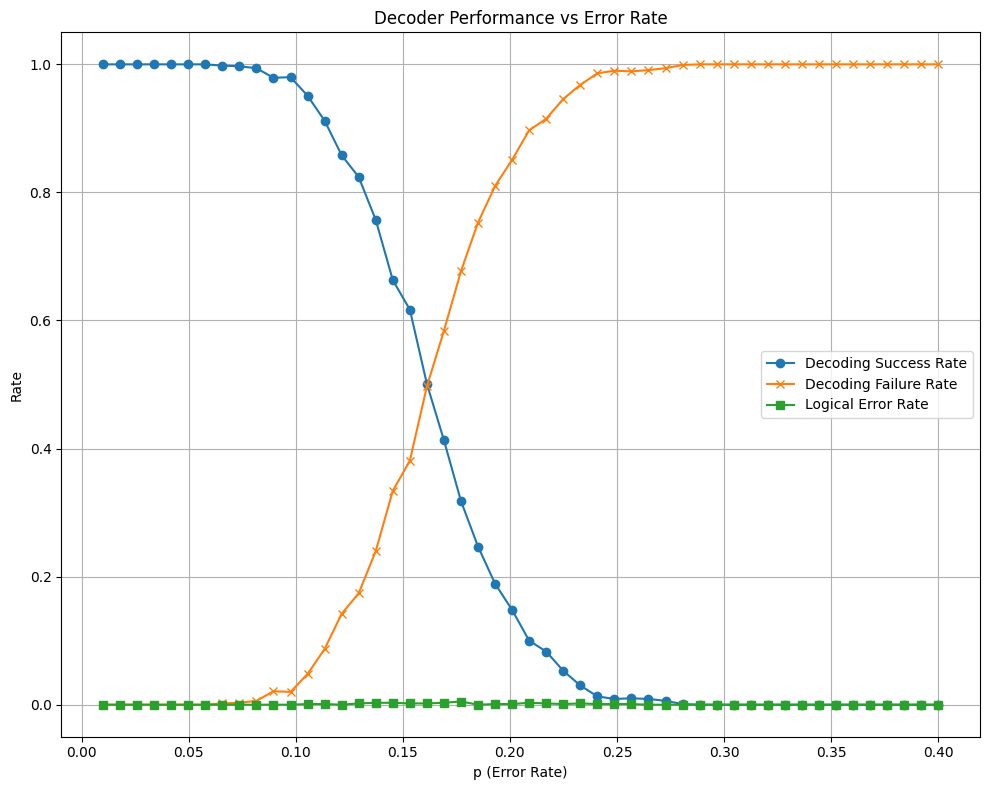

In [ ]:
# Try different stabilizer shapes
shape_1 = np.array([[0, 1, 0],
                    [0, 1, 0],
                    [1, 0, 1]])


error_rates, success_rates, logical_rates, failure_rates = simulate_decoder_performance(
    H=8,
    L=17,
    m=3,
    stabilizer_shape=shape_1,
    num_trials=1000
)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(error_rates, success_rates, label='Decoding Success Rate', marker='o')
plt.plot(error_rates, failure_rates, label='Decoding Failure Rate', marker='x')
plt.plot(error_rates, logical_rates, label='Logical Error Rate', marker='s')

plt.xlabel('p (Error Rate)')
plt.ylabel('Rate')
plt.title('Decoder Performance vs Error Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# BP decoding performance for codeword made by stabilizer shape below
[0, 1, 0], <br>
[1, 1, 1], <br>
[0, 0, 0]

comparison between **decoding success rate** (converged) vs **decoding failure rate** (didn't converge) vs **logical error rate**

Stabilizer shape:
[[0 1 0]
 [1 1 1]
 [0 0 0]]
Rows: 3, Cols: 3
Generating H matrix of size 119 x 136


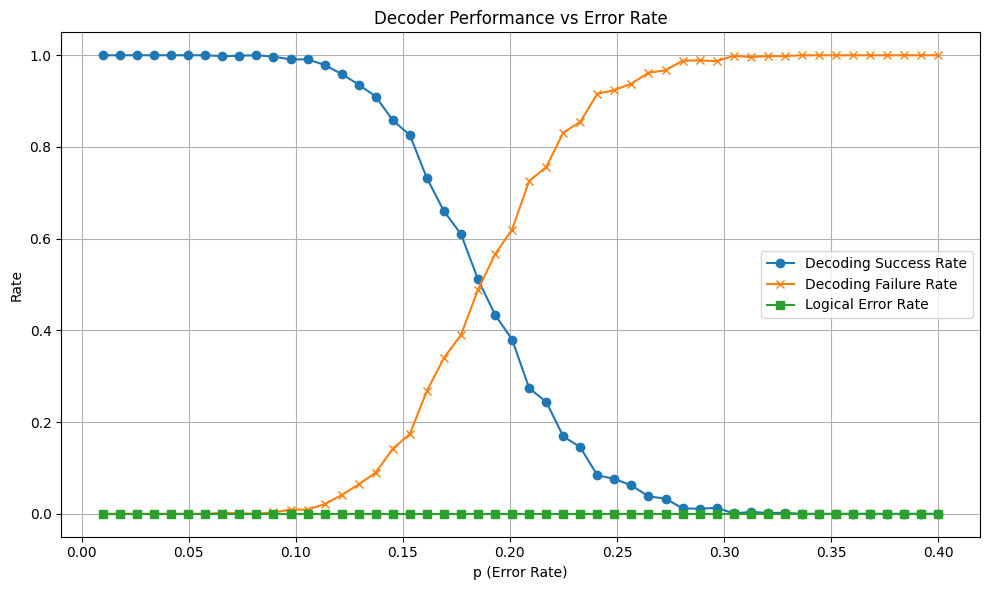

In [ ]:
shape_2 = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 0, 0]])

error_rates, success_rates, logical_rates, failure_rates = simulate_decoder_performance(
    H=8,
    L=17,
    m=2,
    stabilizer_shape=shape_2,
    num_trials=1000
)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(error_rates, success_rates, label='Decoding Success Rate', marker='o')
plt.plot(error_rates, failure_rates, label='Decoding Failure Rate', marker='x')
plt.plot(error_rates, logical_rates, label='Logical Error Rate', marker='s')

plt.xlabel('p (Error Rate)')
plt.ylabel('Rate')
plt.title('Decoder Performance vs Error Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# BP decoding performance for codeword made by stabilizer shape below
[0, 1, 0], <br>
[1, 0, 0], <br>
[1, 1, 0]

comparison between **decoding success rate** (converged) vs **decoding failure rate** (didn't converge) vs **logical error rate**

Stabilizer shape:
[[0 1 0]
 [1 0 0]
 [1 1 0]]
Rows: 3, Cols: 3
Generating H matrix of size 102 x 136


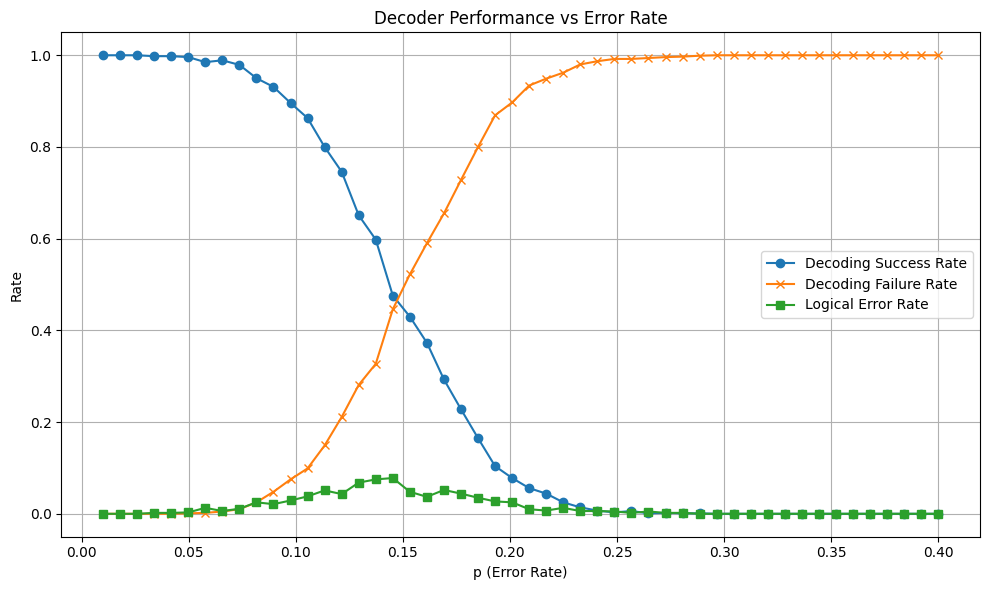

In [ ]:
shape_2 = np.array([[0, 1, 0],
                    [1, 0, 0],
                    [1, 1, 0]])

error_rates, success_rates, logical_rates, failure_rates = simulate_decoder_performance(
    H=8,
    L=17,
    m=3,
    stabilizer_shape=shape_2,
    num_trials=1000
)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(error_rates, success_rates, label='Decoding Success Rate', marker='o')
plt.plot(error_rates, failure_rates, label='Decoding Failure Rate', marker='x')
plt.plot(error_rates, logical_rates, label='Logical Error Rate', marker='s')

plt.xlabel('p (Error Rate)')
plt.ylabel('Rate')
plt.title('Decoder Performance vs Error Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# BP decoding performance for codeword made by stabilizer shape below
[0, 1, 0], <br>
[1, 1, 0], <br>
[0, 0, 1]

comparison between **decoding success rate** (converged) vs **decoding failure rate** (didn't converge) vs **logical error rate**

Stabilizer shape:
[[0 1 0]
 [1 1 0]
 [0 0 1]]
Rows: 3, Cols: 3
Generating H matrix of size 102 x 136


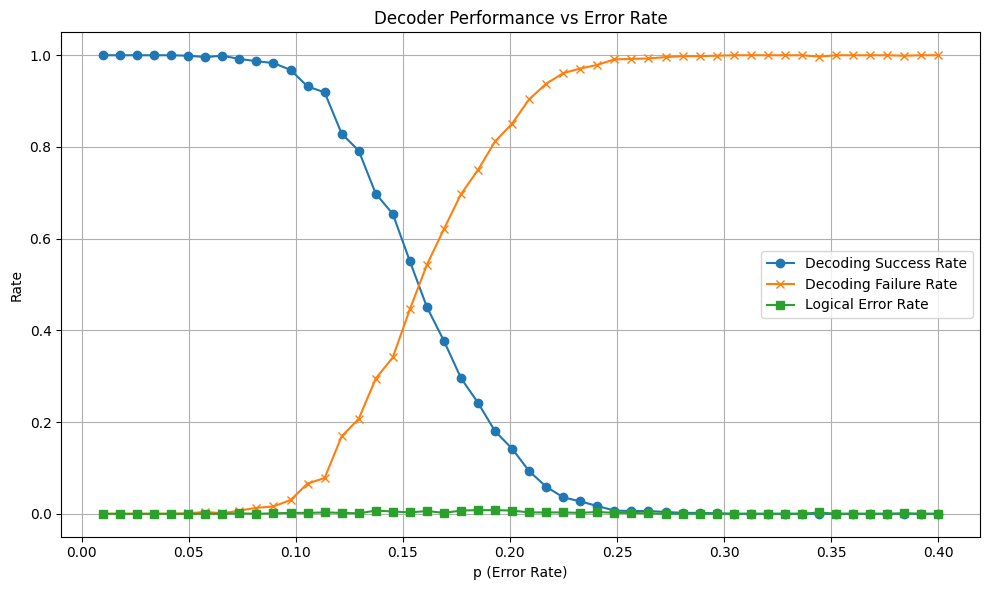

In [9]:
shape_2 = np.array([[0, 1, 0],
                    [1, 1, 0],
                    [0, 0, 1]])

error_rates, success_rates, logical_rates, failure_rates = simulate_decoder_performance(
    H=8,
    L=17,
    m=3,
    stabilizer_shape=shape_2,
    num_trials=1000
)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(error_rates, success_rates, label='Decoding Success Rate', marker='o')
plt.plot(error_rates, failure_rates, label='Decoding Failure Rate', marker='x')
plt.plot(error_rates, logical_rates, label='Logical Error Rate', marker='s')

plt.xlabel('p (Error Rate)')
plt.ylabel('Rate')
plt.title('Decoder Performance vs Error Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
